# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

## Import libraries 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn. linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error


## Exploratory Data Analysis 

In [4]:
df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [6]:
df["newpaper"] = df["newpaper"].str.replace("s", "")
df["newpaper"] = df["newpaper"].astype(float)
df

,TV,radio,newpaper,sales
0,230.1,37.8,69.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    float64
 3   sales     200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


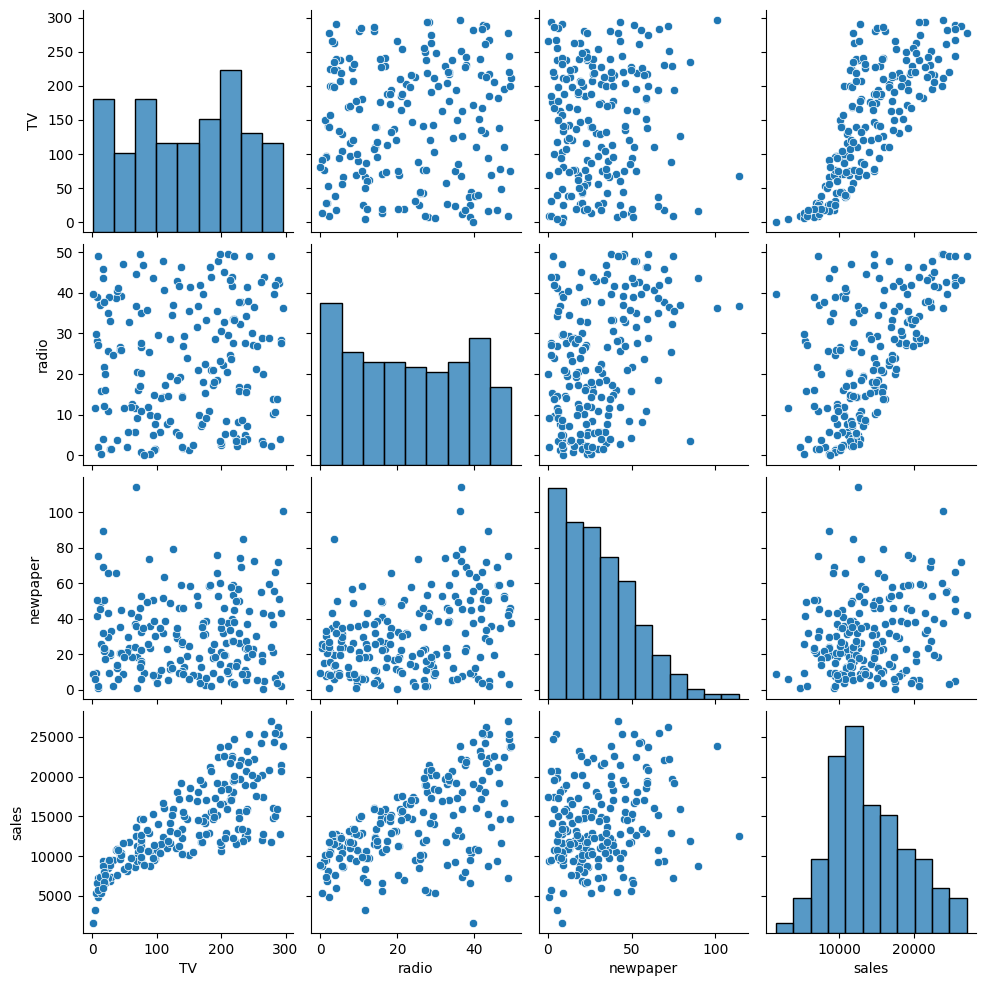

In [9]:
sns.pairplot(df)

<Axes: >

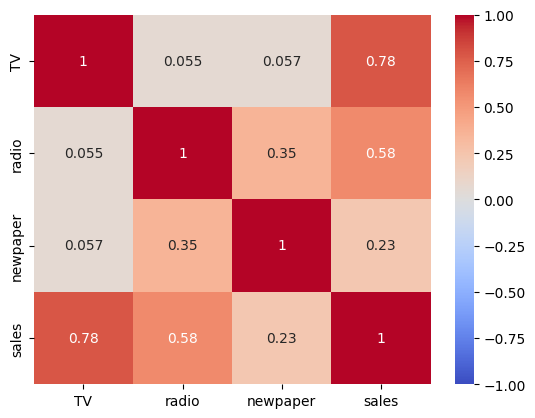

In [10]:
sns.heatmap(df.corr(), annot= True, vmin= -1, cmap="coolwarm")

## Modelado

In [11]:
X =df.drop(columns=["sales"])
y = df["sales"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=10)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [15]:
ln = LinearRegression()
ln.fit(X_train, y_train)

pred = ln.predict(X_test)

print("MAE: ", mean_absolute_error(y_test, pred))
print("MSE: ", mean_squared_error(y_test, pred))

MAE:  1885.0130310423156
MSE:  6700486.756528875


# Normalizacion.

In [ ]:
st_scaler = StandardScaler()
st_scaler.fit(X_train)
X_train_st_scall = st_scaler.transform(X_train)
X_test_st_scall = st_scaler.transform(X_test)

X_train_st_scall

In [ ]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm_scall = mm_scaler.transform(X_train)
X_test_mm_scall = mm_scaler.transform(X_test)

X_train_mm_scall

In [19]:
ln_2 = LinearRegression()
ln_2.fit(X_train_mm_scall, y_train)

pred_scal_mm = ln_2.predict(X_test_mm_scall)

print("MAE: ", mean_absolute_error(y_test, pred_scal_mm))
print("MSE: ", mean_squared_error(y_test, pred_scal_mm))

MAE:  1885.0130310423156
MSE:  6700486.756528878


In [20]:
ln_3 = LinearRegression()
ln_3.fit(X_train_st_scall, y_train)

pred_scal_st = ln_3.predict(X_test_st_scall)

print("MAE: ", mean_absolute_error(y_test, pred_scal_st))
print("MSE: ", mean_squared_error(y_test, pred_scal_st))

MAE:  1885.0130310423162
MSE:  6700486.756528879


In [28]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train_st_scall, y_train)

pred_ridge = ridge.predict(X_test_st_scall)

print("MAE: ", mean_absolute_error(y_test, pred_ridge))
print("MSE: ", mean_squared_error(y_test, pred_ridge))

MAE:  1885.1300694462284
MSE:  6700746.555760504


In [24]:
baseline_error = 6700512

In [26]:
n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

coef_ridge = []
err_ridge = []
baseline = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_st_scall, y_train)
    
    # coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test_st_scall)
    ridge_error = mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

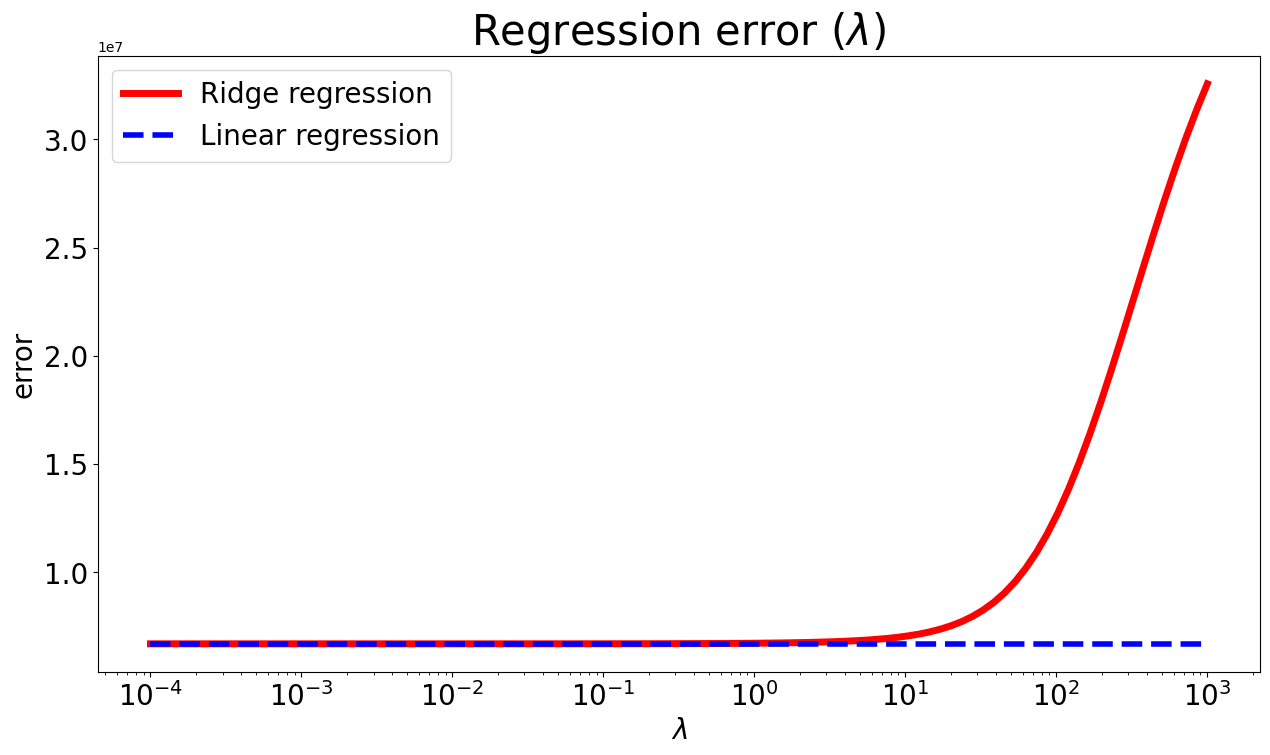

In [27]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('error', fontsize=20)
ax.legend(fontsize=20)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [30]:
poly_2 = PolynomialFeatures(degree=2)
poly_2.fit(X_train_st_scall)
x_train_poly_2 = poly_2.transform(X_train_st_scall)
x_test_poly_2 = poly_2.transform(X_test_st_scall)


In [31]:
poly_3 = PolynomialFeatures(degree=3)
poly_3.fit(X_train_st_scall)
x_train_poly_3 = poly_3.transform(X_train_st_scall)
x_test_poly_3 = poly_3.transform(X_test_st_scall)

In [32]:
poly_4 = PolynomialFeatures(degree=4)
poly_4.fit(X_train_st_scall)
x_train_poly_4 = poly_4.transform(X_train_st_scall)
x_test_poly_4 = poly_4.transform(X_test_st_scall)

In [34]:
ln_poly_2 = LinearRegression()
ln_poly_2.fit(x_train_poly_2, y_train)

pred_poly_2 = ln_poly_2.predict(x_test_poly_2)

print("MAE: ", mean_absolute_error(y_test, pred_poly_2))
print("MSE: ", mean_squared_error(y_test, pred_poly_2))



MAE:  508.76873095948395
MSE:  937286.0482638448


In [35]:
ln_poly_3 = LinearRegression()
ln_poly_3.fit(x_train_poly_3, y_train)

pred_poly_3 = ln_poly_3.predict(x_test_poly_3)

print("MAE: ", mean_absolute_error(y_test, pred_poly_3))
print("MSE: ", mean_squared_error(y_test, pred_poly_3))

MAE:  450.3377198433803
MSE:  674482.3418615082


In [36]:
ln_poly_4 = LinearRegression()
ln_poly_4.fit(x_train_poly_4, y_train)

pred_poly_4 = ln_poly_4.predict(x_test_poly_4)

print("MAE: ", mean_absolute_error(y_test, pred_poly_4))
print("MSE: ", mean_squared_error(y_test, pred_poly_4))

MAE:  422.21875
MSE:  642958.33828125


In [37]:
ln_final = LinearRegression()
ln_final.fit(x_train_poly_4, y_train)

pred_final = ln_final.predict(x_test_poly_4)

print("MAE: ", mean_absolute_error(y_test, pred_final))
print("MSE: ", mean_squared_error(y_test, pred_final))

MAE:  422.21875
MSE:  642958.33828125


In [39]:
def modelo(x_train, xtest):
    ln_final = LinearRegression()
    ln_final.fit(x_train, y_train)

    pred_final = ln_final.predict(xtest)

    print("MAE: ", mean_absolute_error(y_test, pred_final))
    print("MSE: ", mean_squared_error(y_test, pred_final))



In [40]:
modelo(x_train_poly_2, x_test_poly_2)

MAE:  508.76873095948395
MSE:  937286.0482638448


In [41]:
modelo(x_train_poly_3, x_test_poly_3)

MAE:  450.3377198433803
MSE:  674482.3418615082
